# 1. Problem statement

**Recurrent neural network (RNN)** Use the Google stock prices dataset and design a time series analysis and prediction system using RNN.

 - We are given Google stock price from 01/2012 to 12/2017.
 - The task is to predict the trend of the stock price for 01-06 2018.

# 2. Import library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# 3. Data Collection

### 3.0 import the data

In [ ]:
from google.colab import files
files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


{'Google_Stock_Price_Train.csv': b'Date,Open,High,Low,Close,Volume\n01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"\n01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"\n01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"\n01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"\n01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"\n01/10/2012,313.7,315.72,307.3,621.43,"8,824,000"\n01/11/2012,310.59,313.52,309.4,624.25,"4,817,800"\n01/12/2012,314.43,315.26,312.08,627.92,"3,764,400"\n1/13/2012,311.96,312.3,309.37,623.28,"4,631,800"\n1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"\n1/18/2012,312.14,315.82,309.9,631.18,"5,544,000"\n1/19/2012,319.3,319.3,314.55,637.82,"12,657,800"\n1/20/2012,294.16,294.4,289.76,584.39,"21,231,800"\n1/23/2012,291.91,293.23,290.49,583.92,"6,851,300"\n1/24/2012,292.07,292.74,287.92,579.34,"6,134,400"\n1/25/2012,287.68,288.27,282.13,567.93,"10,012,700"\n1/26/2012,284.92,286.17,281.22,566.54,"6,476,500"\n1/27/2012,284.32,289.08,283.6,578.39,"7,262,000"\n1/30/2012,2

In [ ]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [ ]:
dataset_train.head()

Date    Open    High     Low   Close      Volume
0  01/03/2012  325.25  332.83  324.97  663.59   7,380,500
1  01/04/2012  331.27  333.87  329.08  666.45   5,749,400
2  01/05/2012  329.83  330.75  326.89  657.21   6,590,300
3  01/06/2012  328.34  328.77  323.68  648.24   5,405,900
4  01/09/2012  322.04  322.29  309.46  620.76  11,688,800

In [ ]:
#keras only takes numpy array
training_set = dataset_train.iloc[:, 1: 2].values

In [ ]:
training_set.shape

(1509, 1)

### 3.1 Feature scaling

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

### 3.2 Data structure creation

- taking the reference of past 60 days of data to predict the future stock price.  
- It is observed that taking 60 days of past data gives us best results.  
- In this data set 60 days of data means 3 months of data.  
- Every month as 20 days of Stock price.   
- X train will have data of 60 days prior to our date and y train will have data of one day after our date

In [ ]:
## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(1449, 60)

In [ ]:
y_train.shape

(1449,)

### 3.3 Data reshaping

In [ ]:
X_train = np.reshape(X_train, newshape =
                     (X_train.shape[0], X_train.shape[1], 1))

1. Number of stock prices - 1449  
2. Number of time steps - 60  
3. Number of Indicator - 1  

In [ ]:
X_train.shape

(1449, 60, 1)

# 4. Exploratory Data Analysis

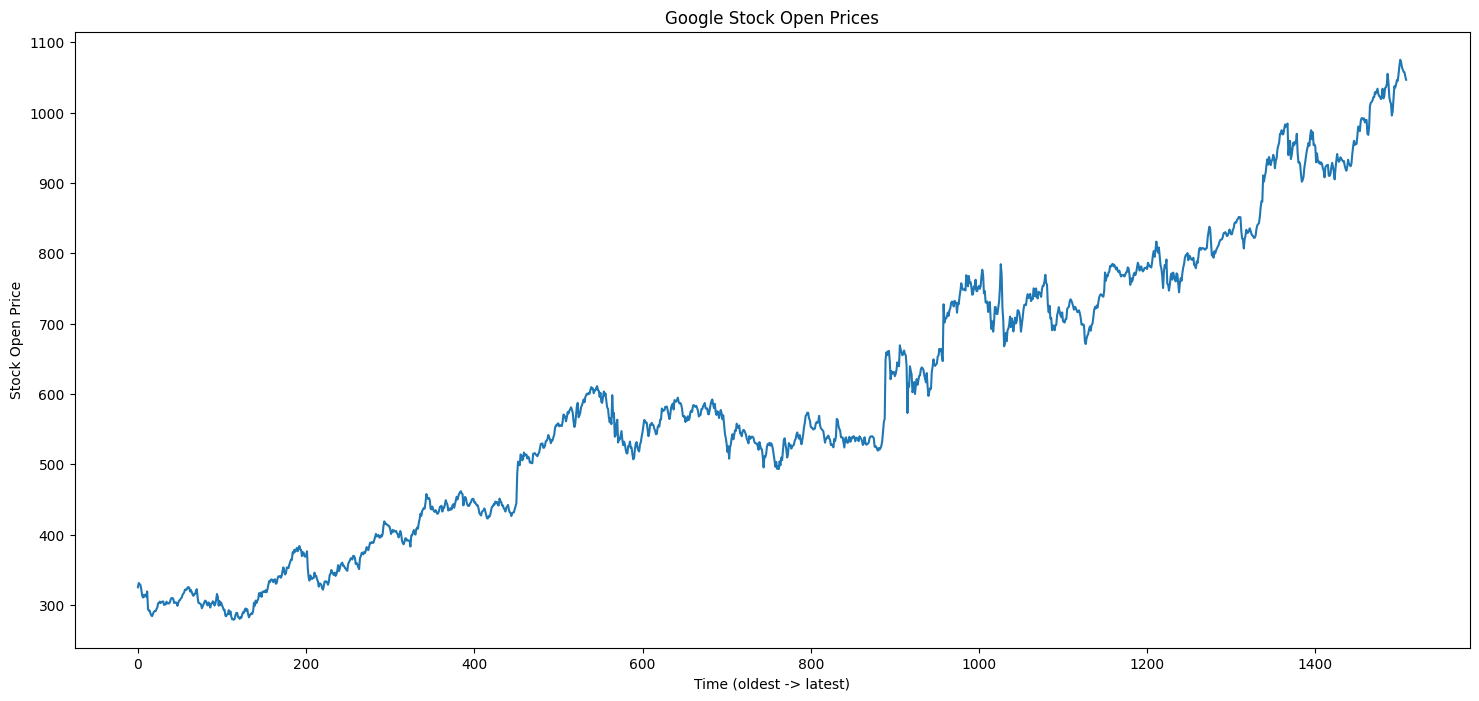

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Low'])
plt.title("Google Stock Low Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Lowest Price")
plt.show()

# 5. Create & Fit Model

### 5.1 Create model

In [ ]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

##add output layer
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### 5.2 Model fit

In [ ]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
46/46 [==============================] - 14s 135ms/step - loss: 0.0276
Epoch 2/100
46/46 [==============================] - 6s 134ms/step - loss: 0.0040
Epoch 3/100
46/46 [==============================] - 5s 108ms/step - loss: 0.0038
Epoch 4/100
46/46 [==============================] - 5s 107ms/step - loss: 0.0039
Epoch 5/100
46/46 [==============================] - 6s 133ms/step - loss: 0.0034
Epoch 6/100
46/46 [==============================] - 5s 108ms/step - loss: 0.0031
Epoch 7/100
46/46 [==============================] - 6s 134ms/step - loss: 0.0029
Epoch 8/100
46/46 [==============================] - 5s 108ms/step - loss: 0.0029
Epoch 9/100
46/46 [==============================] - 6s 127ms/step - loss: 0.0029
Epoch 10/100
46/46 [==============================] - 5s 114ms/step - loss: 0.0026
Epoch 11/100
46/46 [==============================] - 5s 111ms/step - loss: 0.0030
Epoch 12/100
46/46 [==============================] - 6s 134ms/step - loss: 0.0026
Epoch 13/100

# 6. Model evaluation

### 6.1 Read and convert

In [ ]:
from google.colab import files
files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


{'Google_Stock_Price_Test.csv': b'Date,Open,High,Low,Close,Volume\n02/01/2018,1048.339966,1066.939941,1045.22998,1065,1237600\n03/01/2018,1064.310059,1086.290039,1063.209961,1082.47998,1430200\n04/01/2018,1088,1093.569946,1084.001953,1086.400024,1004600\n05/01/2018,1094,1104.25,1092,1102.22998,1279100\n08/01/2018,1102.22998,1111.27002,1101.619995,1106.939941,1047600\n09/01/2018,1109.400024,1110.569946,1101.230957,1106.26001,902500\n10/01/2018,1097.099976,1104.599976,1096.109985,1102.609985,1042800\n11/01/2018,1106.300049,1106.525024,1099.589966,1105.52002,978300\n12/01/2018,1102.410034,1124.290039,1101.150024,1122.26001,1720500\n16/01/2018,1132.51001,1139.910034,1117.832031,1121.76001,1575300\n17/01/2018,1126.219971,1132.599976,1117.01001,1131.97998,1198700\n18/01/2018,1131.410034,1132.51001,1117.5,1129.790039,1198200\n19/01/2018,1131.829956,1137.859985,1128.300049,1137.51001,1778200\n22/01/2018,1137.48999,1159.880005,1135.109985,1155.810059,1618000\n23/01/2018,1159.849976,1171.626953,

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [ ]:
dataset_test.head()

Date         Open         High          Low        Close   Volume
0  02/01/2018  1048.339966  1066.939941  1045.229980  1065.000000  1237600
1  03/01/2018  1064.310059  1086.290039  1063.209961  1082.479980  1430200
2  04/01/2018  1088.000000  1093.569946  1084.001953  1086.400024  1004600
3  05/01/2018  1094.000000  1104.250000  1092.000000  1102.229980  1279100
4  08/01/2018  1102.229980  1111.270020  1101.619995  1106.939941  1047600

In [ ]:
#keras only takes numpy array
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape

(125, 1)

### 6.2 Concat and convert

In [ ]:
#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']),
                          axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

### 6.3 Reshape and scale

In [ ]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)

#scale input
inputs = sc.transform(inputs)

In [ ]:
len(inputs)

185

### 6.4 Create test data strucutre

In [ ]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_test.shape

(125, 60, 1)

# 7. Model prediction

In [ ]:
predicted_stock_price = regressor.predict(X_test)

4/4 [==============================] - 2s 33ms/step


In [ ]:
#inverse the scaled value
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### 7.1 Result visualization

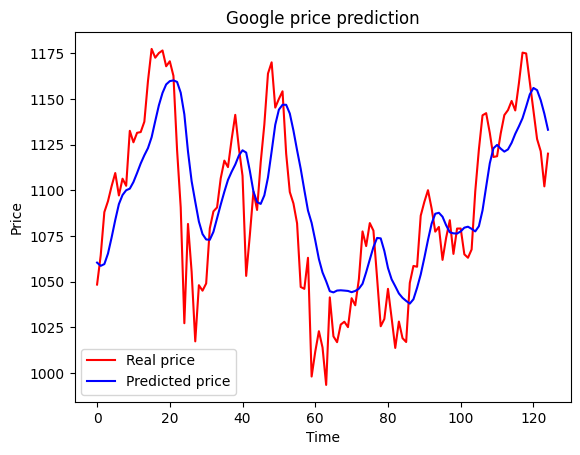

In [ ]:
##visualize the prediction and real price
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of real and predicted prices
plt.figure(figsize=(10, 6))
plt.hist(real_stock_price, bins=30, alpha=0.5, color='red', label='Real Price')
plt.hist(predicted_stock_price, bins=30, alpha=0.5, color='blue', label='Predicted Price')
plt.title('Distribution of Real and Predicted Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()